In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from datetime import datetime
import time

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with open('ks-projects-201612.csv', encoding="utf8", errors='ignore') as file:
    reader = csv.reader(file)
    data_set = list(reader)
data_set = np.array(data_set)


In [2]:
data_set

array([['ID ', 'name ', 'category ', ..., '', '', ''],
       ['1000002330', 'The Songs of Adelaide & Abullah', 'Poetry', ...,
        '', '', ''],
       ['1000004038', 'Where is Hank?', 'Narrative Film', ..., '', '',
        ''],
       ...,
       ['999986353',
        'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
        'Narrative Film', ..., '', '', ''],
       ['999987933', 'BioDefense Education Kit', 'Technology', ..., '',
        '', ''],
       ['999988282', 'Nou Renmen Ayiti!  We Love Haiti!',
        'Performance Art', ..., '', '', '']], dtype='<U96')

In [115]:
#utils
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [116]:
header = data_set[0]
data_set = data_set[1:len(data_set)] #data set without the header

In [117]:
def clean_data_set(data_set):
    ti = time.time()
    delete_lines = []
    for i in range(len(data_set)):
        if isfloat(data_set[i, 6]) == False or data_set[i, 9] not in ['failed', 'successful']:
            delete_lines.append(i)
        elif float(data_set[i,6]) > 10000000 or float(data_set[i,6])< 20:
            delete_lines.append(i)
    data_set = np.delete(data_set, (delete_lines), axis=0)
    tf = time.time()
    print(tf - ti)
    return data_set

data_set = clean_data_set(data_set)

5.840063095092773


In [118]:
data_set_size = len(data_set)
data_set_size

280099

In [119]:
print(header[3])
print(header[2])

Publishing
Poetry


In [120]:
data_set_output = data_set[:,9]
data_set_output

array(['failed', 'failed', 'successful', ..., 'failed', 'failed',
       'failed'], dtype='<U96')

In [121]:
list_of_output = []
for j in range(len(data_set_output)):
    if data_set_output[j] not in list_of_output:
        list_of_output.append(data_set_output[j])

list_of_output

['failed', 'successful']

In [122]:
data_set_category = data_set[:,2]
data_set_category

array(['Narrative Film', 'Music', 'Restaurants', ..., 'Narrative Film',
       'Technology', 'Performance Art'], dtype='<U96')

In [123]:
list_of_categorie =[]
for j in range (len(data_set_category)):
    if data_set_category[j] not in list_of_categorie:
        list_of_categorie.append(data_set_category[j])

len(list_of_categorie)

158

In [12]:
data_set_main_category = data_set[:,3]
data_set_main_category

array(['Publishing', 'Film & Video', 'Music', ..., 'Film & Video',
       'Technology', 'Art'], dtype='<U96')

In [13]:
list_of_main_categorie =[]
for j in range (len(data_set_category)):
    if data_set_main_category[j] not in list_of_main_categorie:
        list_of_main_categorie.append(data_set_main_category[j])

len(list_of_main_categorie)

15

In [14]:
data_set_currency = data_set[:,4]
data_set_currency

array(['GBP', 'USD', 'USD', ..., 'USD', 'USD', 'USD'], dtype='<U96')

In [15]:
list_of_currency =[]
for j in range (len(data_set_currency)):
    if data_set_currency[j] not in list_of_currency:
        list_of_currency.append(data_set_currency[j])

len(list_of_currency)

13

In [16]:
data_set_country = data_set[:,11]
data_set_country

array(['GB', 'US', 'US', ..., 'US', 'US', 'US'], dtype='<U96')

In [17]:
list_of_country =[]
for j in range (len(data_set_country)):
    if data_set_country[j] not in list_of_country:
        list_of_country.append(data_set_country[j])

len(list_of_country)

22

In [18]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

In [19]:
header

array(['ID ', 'name ', 'category ', 'main_category ', 'currency ',
       'deadline ', 'goal ', 'launched ', 'pledged ', 'state ',
       'backers ', 'country ', 'usd pledged ', '', '', '', ''],
      dtype='<U96')

In [20]:
import time
def build_input_layer(data_set):
    ti = time.time()
    input_data_set = np.zeros((len(data_set),4))
    for i in range (len(data_set)):
        if isfloat(data_set[i,6]):
            input_data_set[i,0] = days_between(data_set[i][7],data_set[i][5]) #time allowed to get the money
            input_data_set[i,1] = float(data_set[i][6]) #the goal
            input_data_set[i,2] = list_of_main_categorie.index(data_set[i][3]) #the main categorie is now encoding with a number beetween 0 and 120
            #input_data_set[i,3] = list_of_categorie.index(data_set[i][2]) #the categorie is now encoding with a number
            input_data_set[i,3] = list_of_country.index(data_set[i][11]) # the country encoding with a number
            #input_data_set[i,5] = list_of_currency.index(data_set[i][4]) # the currency encoding with a number
    tf = time.time()
    print("temps : " +str(tf-ti))
    return input_data_set   

In [21]:
input_data = build_input_layer(data_set)

temps : 9.55872392654419


26620.387152445557

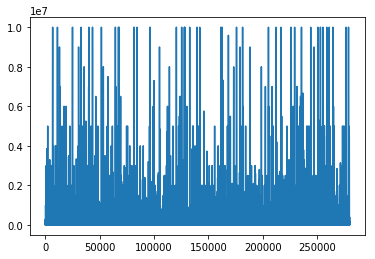

In [22]:
plt.plot(input_data[:,1])
np.mean(input_data[:,1])

In [23]:
#normalize the input_data
#max date time
max_date = max(input_data[:,0])
#max goal 
max_goal =max(input_data[:,1])
#max main categorie
max_main_categorie = max(input_data[:,2])
#max categorie
#max_categorie = max(input_data[:,3])
#max country
max_country = max(input_data[:,3])
#max currency
#max_currency = max(input_data[:,5])

def normalize_input_data(input_data):
    input_data[:,0] = np.divide(input_data[:,0],max_date)*100
    input_data[:,1] = np.divide(input_data[:,1],max_goal)*100
    input_data[:,2] = np.divide(input_data[:,2],max_main_categorie)*100
    #input_data[:,3] = np.divide(input_data[:,3],max_categorie)
    input_data[:,3] = np.divide(input_data[:,3],max_country)*100
    #input_data[:,5] = np.divide(input_data[:,5],max_currency)
    
    return input_data

input_data = normalize_input_data(input_data)

In [24]:
def build_target_layer(data_set):
    target_data = np.zeros(len(data_set))
    for i in range (len(data_set)):
        if data_set[i,9]=='failed':
            target_data[i] = 0
        else :
            target_data[i]= 1
    return target_data
target_data = build_target_layer(data_set)

In [25]:
print (len(target_data))
print (len(input_data))
np.mean(input_data[:,1])

280100
280100


0.26620387152445557

In [26]:
train_data_set_size = 100000
test_data_set_size = 50000
train_input_data = input_data[0:train_data_set_size]
test_input_data = input_data[train_data_set_size + 1 : train_data_set_size + test_data_set_size]

train_target_data = target_data[0:train_data_set_size]
test_target_data = target_data[train_data_set_size + 1 : train_data_set_size + test_data_set_size]

In [ ]:
#build the model in tensorflow
# Graph Inputs
tf_features = tf.placeholder(tf.float32, [None, 6])
tf_targets = tf.placeholder(tf.float32, [None, 1])

#softmax_input = tf.nn.softmax(tf_features)

# Variables 1 layer
w1 = tf.Variable(tf.random_normal([6, 100]))
b1 = tf.Variable(tf.zeros([100]))

#  Operations 1
z1 = tf.matmul(tf_features, w1) + b1
sigmoid1 = tf.math.sigmoid(z1)

#Variable 2 layer

w2 = tf.Variable(tf.random_normal([100, 1]))
b2 = tf.Variable(tf.random_normal([1]))

# Operation 2
z2 = tf.matmul(sigmoid1, w2) + b2
sigmoid2 = tf.nn.sigmoid(z2)

# Error + Train
error = tf.nn.softmax_cross_entropy_with_logits(labels=tf_targets, logits=sigmoid2)
#error = tf.math.abs(tf_targets - softmax2)
train = tf.train.GradientDescentOptimizer(0.5).minimize(error)

# Metrics: Accuracy
# correct_prediction = tf.equal(tf.argmax(softmax1, 1), tf.argmax(tf_targets, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test = np.random.rand(10, 6)
    # Train the model
    epochs = 10
    for e in range(epochs):
        batch_features, batch_targets = train_input_data[0:10], np.reshape(train_target_data[0: 10],(10,1))
        _, error_, z1_ = sess.run([train, error, z1], 
            feed_dict={
            tf_features: batch_features,
            tf_targets: batch_targets})
        #print("error = "+str(error_))
        print("z1 = "+str(z1_))
        print("softmax_1 = "+ str(softmax1_))

In [ ]:
np.shape(np.reshape(train_target_data, (len(train_target_data),1)))

In [97]:
n_x = 4
n_h = 1
n_y = 1

In [98]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) 
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) 
    b2 = np.zeros(shape=(n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [99]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [100]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Retrieve W1 and W2 from parameters
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [101]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [102]:
def update_parameters(parameters, grads, learning_rate=0.006):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [111]:
def nn_model(X, Y, n_h, nb_batch, batch_size, epoch=1000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (4, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    save_cost = []
    # Loop (gradient descent)

    for e in range(0, epoch):
        i=0
        batch_X=[]
        batch_Y=[]
        for i in range (nb_batch):
            batch_X= X[batch_size*i:batch_size*(i+1)].T
            batch_Y= Y[batch_size*i:batch_size*(i+1)].T
            ### START CODE HERE ### (≈ 4 lines of code)
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            A2, cache = forward_propagation(batch_X, parameters)

            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = compute_cost(A2, batch_Y, parameters)

            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            grads = backward_propagation(parameters, cache, batch_X, batch_Y)

            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
            parameters = update_parameters(parameters, grads)
            if i%50==0:
                print("cost batch " +str(i)+" epoch n° " +str(e) + ": "+ str(cost))
            ### END CODE HERE ###
        if e%100 == 0:
            save_cost.append(cost)
        # Print the cost every 1000 iterations
        if print_cost and e % 100 == 0:
            print ("Cost after iteration %i: %f" % (e, cost))
        plt.plot(save_cost[1:len(save_cost)])
    return parameters

cost batch 0 epoch n° 0: 1.1720026784945923
cost batch 50 epoch n° 0: 1.0821585970528642
Cost after iteration 0: 1.024049


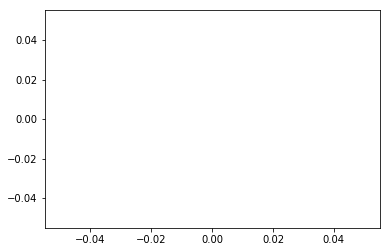

In [112]:
parameters = nn_model(train_input_data, 
                      np.reshape(train_target_data,(len(train_target_data),1)), 
                      n_h, nb_batch=100, batch_size=1000, epoch=1, print_cost=True)

In [113]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [114]:
predictions = predict(parameters, test_input_data[0:10000].T)
print ('Accuracy: %d' % float((np.dot(train_target_data[0:10000], predictions.T) + 
                               np.dot(1 - test_target_data[0:10000], 1 - predictions.T)) / float(test_target_data[0:10000].size) * 100) + '%')

Accuracy: 41%
